# iLykei Lecture Series
# Text Analytics (Northwestern University, MSIA 414)   
# Introduction to NLTK, Part 1



## Yuri Balasanov, &copy; iLykei 2018-2023
##### Main text: Natural Language Processing with Python, Steven Bird, Ewan Klein & Edward Loper, &copy; Steven Bird, Ewan Klein & Edward Loper 2009, O'Reilly Media, Inc


Import package _nltk_ <br>
Download collection of books contained in _nltk_ for examples.
In the dialogue opened by _nltk.download()_ select line **book**.

In [1]:
%matplotlib inline
import nltk
#nltk.download()

Import all items in _books_ collection.

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
print(text1)
print(text2)

<Text: Moby Dick by Herman Melville 1851>
<Text: Sense and Sensibility by Jane Austen 1811>


# Simple Tasks

## Searching text

Searching of a word with some context in a text can be done by *concordance()*.
See how differently the word "monstrous" is used in Moby Dick by Herman Melville and in Sense and Sensibility by Jane Austen.

In [4]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [5]:
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


To get a better understanding of different colors of the word "monstrous" in the two books search for similar words in each text, i.e. words that appear in the same context.

In [6]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [7]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


To find common contexts of several words use *common_contexts()*. For example, look at the first word on the similar lists to "monstrous" in both books. 

In [8]:
text1.common_contexts(["monstrous","true"])

the_pictures


In [9]:
text2.common_contexts(["monstrous","very"])

am_glad a_pretty a_lucky is_pretty be_glad


How many times and where in the book the word appears?
This question is answered by *dispersion_plot()*

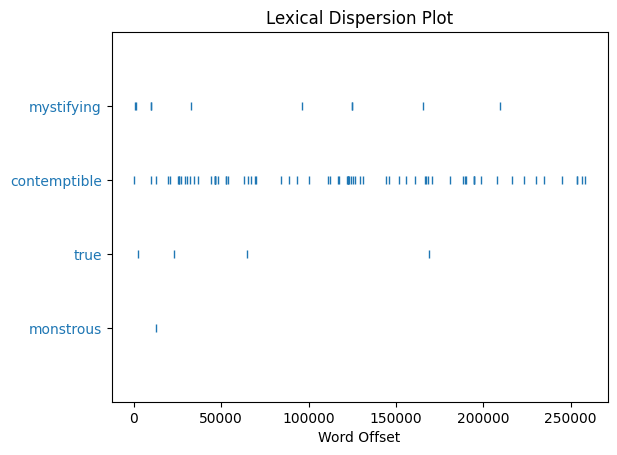

In [10]:
text1.dispersion_plot(["monstrous","true","contemptible","mystifying"])

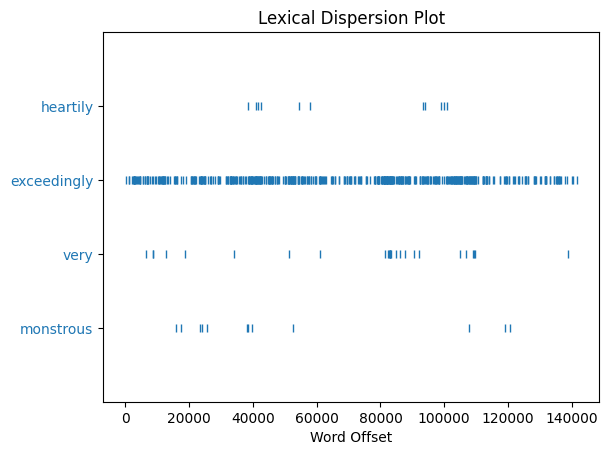

In [11]:
text2.dispersion_plot(["monstrous","very","exceedingly","heartily"])

Each mark on dispersion plot shows location of the searched word instance in the entire sequence of words in the book.

These plots, among other things, allow us checking how valuable are the insights that we gained from simple searches. For example, word "true" may seem associated with "monstrous" in Moby Dick just because "true" is very frequent word. Same can be said about association of "monstrous" and "very" in Sense and Sensibility. 

An interesting pattern is observed in inaugural speaches of American Presidents in history.

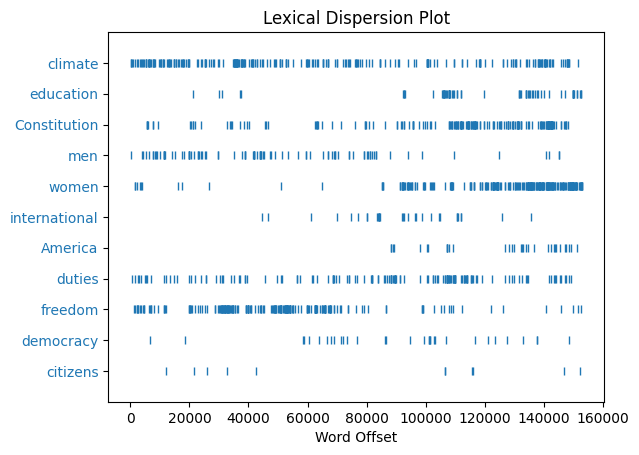

In [12]:
text4.dispersion_plot(["citizens","democracy","freedom","duties","America", \
                       "international","women","men","Constitution","education","climate"])

## Working with vocabularies

Texts observed in the NLTK corpora have been prepared for analysis and actually are in the form of list.

Start with counting words.

In [13]:
print('Length of The Book of Genesis is:',len(text3))
print(text3[:20])

Length of The Book of Genesis is: 44764
['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.', 'And', 'the', 'earth', 'was', 'without', 'form', ',', 'and', 'void']


We see that count contains all words and punctuation sympols. Sequences of characters representing words, punctuation or other special symbols are called **tokens**.
So, *len()* calculated number of tokens.
But some of them appear multiple times.

**Vocabulary** is a set of tokens created from the text. Recall that in Python set collapses all duplicates.

In [14]:
print('Set of tokens in The Book of Genesis is:', sorted(set(text3))[:20])
print(len(set(text3)))

Set of tokens in The Book of Genesis is: ['!', "'", '(', ')', ',', ',)', '.', '.)', ':', ';', ';)', '?', '?)', 'A', 'Abel', 'Abelmizraim', 'Abidah', 'Abide', 'Abimael', 'Abimelech']
2789


Such vocabulary is much smaller.
But it is not what we typically call vocabulary yet because it does contain many uninformative tokens, like ',)', ';)', etc.
This vocabulary contains items called **types** which is a generalization of **word types** to include non-word tokens.
Types are unique items from the set of tokens.

To analyze richness of the text look at average number of times words are used. 
For example, native people of the North have in their languages multiple words for snow: different states, shades of color, etc. Compare their description of winter day with a description of a person living close to equator. Description of a Southerner will contain multiple appearance of the same word "snow", but Northerner will use multiple names, each of them fewer times. Native Northern text in this case will have more **lexical diversity**, at least on the subject. 

Lexical diversity is commonly calculated as either **ratio of length of the text (tokens) to length of its set (types)** or inverse of this ratio. 

As a measure of richness of text lexical diversity may be misleading if compared texts have different sizes. Much longer texts tend to have smaller proportion of unique types, so ratio of tokens to types appears larger which may be falsely interpreted as lower richness. 

In [15]:
print(len(text3)/len(set(text3)))

16.050197203298673


On average each type appeared a little over 16 times.
Check how often individual types appear in the text expressed in percentage points.

In [16]:
wordCounts=text4.count("duty"),text4.count("men"),text4.count("women"),text4.count("a")
print(wordCounts)
100*text4.count("duty")/len(text4),100*text4.count("men")/len(text4), \
100*text4.count("women")/len(text4),100*text4.count("a")/len(text4)

(120, 144, 33, 2229)


(0.0784821551199796,
 0.0941785861439755,
 0.02158259265799439,
 1.457806031353621)

Create functions for calculation of lexical diversity of the text and percentage of use of the type.

In [17]:
def lexical_diversity(text):
    return len(text)/len(set(text))

def percentage(text, word):
    # calculate percentage of word usage in text
    # count is type count in the document
    # total is the total length of the text
    count=text.count(word)
    total=len(text)
    return 100*count/total

Now compare lexical diversities of different texts

In [18]:
print('Moby Dick: ',lexical_diversity(text1),
      '\nSense and Sensibility: ',lexical_diversity(text2),
      '\nThe Book of Genesis: ',lexical_diversity(text3),
      '\nInaugural Address: ',lexical_diversity(text4))

Moby Dick:  13.502044830977896 
Sense and Sensibility:  20.719449729255086 
The Book of Genesis:  16.050197203298673 
Inaugural Address:  15.251970074812968


Add chats and Wall Street Journal articles

In [19]:
print('Chats: ',lexical_diversity(text5),
      '\nWSJ Articles: ',lexical_diversity(text7))

Chats:  7.420046158918563 
WSJ Articles:  8.113797549967762


**What can lexical diversity tell about writing style or genre?**

In [20]:
print('"Happy" in Sense and Sensibility: ',percentage(text2,"happy"),
      '\n"Happy" in Moby Dick:',percentage(text1,"happy"))

"Happy" in Sense and Sensibility:  0.06780810306831667 
"Happy" in Moby Dick: 0.0030672612041300674


In [21]:
print('"Wild" in Sense and Sensibility: ',percentage(text2,"wild"),
      '\n"Wild" in Moby Dick:',percentage(text1,"wild"))

"Wild" in Sense and Sensibility:  0.0028253376278465276 
"Wild" in Moby Dick: 0.03143942734233319


## Calculating frequency distributions of words

Calculate frequency distribution of words in Moby Dick by `FreqDist()`.
The output of it is a dictionary with key-value pairs.

In [22]:
fdist1=FreqDist(text1)
print(fdist1.most_common(50))

[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632), ('as', 1620), ('"', 1478), ('all', 1462), ('for', 1414), ('this', 1280), ('!', 1269), ('at', 1231), ('by', 1137), ('but', 1113), ('not', 1103), ('--', 1070), ('him', 1058), ('from', 1052), ('be', 1030), ('on', 1005), ('so', 918), ('whale', 906), ('one', 889), ('you', 841), ('had', 767), ('have', 760), ('there', 715), ('But', 705), ('or', 697), ('were', 680), ('now', 646), ('which', 640), ('?', 637), ('me', 627), ('like', 624)]


In [23]:
vocabulary1=dict(fdist1.most_common(50)).keys()
print(vocabulary1)
sum(dict(fdist1.most_common(50)).values())/len(text1)

dict_keys([',', 'the', '.', 'of', 'and', 'a', 'to', ';', 'in', 'that', "'", '-', 'his', 'it', 'I', 's', 'is', 'he', 'with', 'was', 'as', '"', 'all', 'for', 'this', '!', 'at', 'by', 'but', 'not', '--', 'him', 'from', 'be', 'on', 'so', 'whale', 'one', 'you', 'had', 'have', 'there', 'But', 'or', 'were', 'now', 'which', '?', 'me', 'like'])


0.46670296259091554

Can most frequent tokens help understanding what the text is about, its topic or genre?
These 50 tokens make up almost half of the book.
But most of these words do not carry any information. 
**Which words are informative among the most frequent 50**?

Will rare words help? Words that occur only once are called **hapaxes**.

In [24]:
print(len(fdist1.hapaxes()))
print(fdist1.hapaxes()[:50])

9002
['Herman', 'Melville', ']', 'ETYMOLOGY', 'Late', 'Consumptive', 'School', 'threadbare', 'lexicons', 'mockingly', 'flags', 'mortality', 'signification', 'HACKLUYT', 'Sw', 'HVAL', 'roundness', 'Dut', 'Ger', 'WALLEN', 'WALW', 'IAN', 'RICHARDSON', 'KETOS', 'GREEK', 'CETUS', 'LATIN', 'WHOEL', 'ANGLO', 'SAXON', 'WAL', 'HWAL', 'SWEDISH', 'ICELANDIC', 'BALEINE', 'BALLENA', 'FEGEE', 'ERROMANGOAN', 'Librarian', 'painstaking', 'burrower', 'grub', 'Vaticans', 'stalls', 'higgledy', 'piggledy', 'gospel', 'promiscuously', 'commentator', 'belongest']


Rare words do not seem to help either.

Try to select long words.

In [25]:
V=set(text1)
long_words=[w for w in V if len(w)>15]
print(sorted(long_words))

['CIRCUMNAVIGATION', 'Physiognomically', 'apprehensiveness', 'cannibalistically', 'characteristically', 'circumnavigating', 'circumnavigation', 'circumnavigations', 'comprehensiveness', 'hermaphroditical', 'indiscriminately', 'indispensableness', 'irresistibleness', 'physiognomically', 'preternaturalness', 'responsibilities', 'simultaneousness', 'subterraneousness', 'supernaturalness', 'superstitiousness', 'uncomfortableness', 'uncompromisedness', 'undiscriminating', 'uninterpenetratingly']


Now select words in chats that are longer than 7 and appear more frequently than 7 times.

In [26]:
fdist5=FreqDist(text5)
print(sorted([w for w in set(text5) if len(w)>7 and fdist5[w]>7]))

['#14-19teens', '#talkcity_adults', '((((((((((', '........', 'Question', 'actually', 'anything', 'computer', 'cute.-ass', 'everyone', 'football', 'innocent', 'listening', 'remember', 'seriously', 'something', 'together', 'tomorrow', 'watching']


At least this finds some meaningful words.

## Collocations and bigrams

**Collocation** is frequent sequence of words. 'Windy City' may be a collocation in texts about Chicago.
Collocations can be detected by **drop of frequency of the combination with some word replaced by a similar one**: 'Sleepy City'.

Start searching for collocations by extracting pairs of words called **bigrams**.

In [27]:
print(nltk.bigrams(['to', 'be', ',', 'or', 'not', 'to', 'be', ',', 'that', 'is', 'the', 'question']))
list(nltk.bigrams(['to', 'be', ',', 'or', 'not', 'to', 'be', ',', 'that', 'is', 'the', 'question']))

<generator object bigrams at 0x7f8cf6e7f530>


[('to', 'be'),
 ('be', ','),
 (',', 'or'),
 ('or', 'not'),
 ('not', 'to'),
 ('to', 'be'),
 ('be', ','),
 (',', 'that'),
 ('that', 'is'),
 ('is', 'the'),
 ('the', 'question')]

Collocations are frequent bigrams.
Method `collocations()` looks for bigrams that **occur more frequently relative to the individual frequencies of the words**.
Collocations are usually pretty specific to the subject of the document.

In [28]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [29]:
bigram_measures

In [30]:
finder=BigramCollocationFinder.from_words(text4)
finder.nbest(bigram_measures.pmi, 10)

[('/', '11'),
 ('25', 'straight'),
 ('Amelia', 'Island'),
 ('Apollo', 'astronauts'),
 ('Archibald', 'MacLeish'),
 ('BUSINESS', 'COOPERATION'),
 ('Barbary', 'Powers'),
 ('Belleau', 'Wood'),
 ('Boston', 'lawyer'),
 ('Britannic', 'Majesty')]

## Distribution of lengths of words

Another important characteristic is distribution of words' lengths.
Create list of words' lengths.

In [31]:
[len(w) for w in text1][:20]

[1, 4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4, 11, 5, 2, 1, 7]

Calculate distribution

In [32]:
fdist=FreqDist([len(w) for w in text1])
print(fdist)
fdist.items()

<FreqDist with 19 samples and 260819 outcomes>


dict_items([(1, 47933), (4, 42345), (2, 38513), (6, 17111), (8, 9966), (9, 6428), (11, 1873), (5, 26597), (7, 14399), (3, 50223), (10, 3528), (12, 1053), (13, 567), (14, 177), (16, 22), (15, 70), (17, 12), (18, 1), (20, 1)])

In [33]:
fdist.freq(1),fdist.freq(2),fdist.freq(3)

(0.18377878912195814, 0.14766178844332659, 0.19255882431878046)

# Accessing Text Corpora in NLTK

There are other interesting resources available through nltk besides the collection of books.

## Gutenberg corpus

[Gutengerg project](http://gutenberg.org/) is a public project providing free electronic books. NLTK includes some of them.

In [34]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

These texts are not prepared for analysis as the documents in the *books* collection.
How many words the first book has?

In [35]:
emma=nltk.corpus.gutenberg.words('austen-emma.txt')
emma[:10]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

Another, and shorter, way of doing this is

In [36]:
from nltk.corpus import gutenberg
print(gutenberg.fileids())
emma=gutenberg.words(('austen-emma.txt'))
emma[:10]

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

To use functions of the previous sections on a list returned by *words()* use wrapper *Text()*

In [37]:
print(nltk.Text(emma))
print(nltk.Text(emma)[:10])
nltk.Text(emma).concordance('girl')

<Text: Emma by Jane Austen 1816>
['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']
Displaying 25 of 47 matches:
t : she is a civil , pretty - spoken girl ; I have a great opinion of her . Wh
lcome request : for Miss Smith was a girl of seventeen , whom Emma knew very w
ere with her . She was a very pretty girl , and her beauty happened to be of a
 very unfit to be the intimates of a girl who wanted only a little more knowle
e ; but the humble , grateful little girl went off with highly gratified feeli
 that he thought Harriet a beautiful girl , which she trusted , with such freq
 could not dispense with :-- but the girl who could be gratified by a Robert M
r Emma , that there should be such a girl in Highbury for her to associate wit
h of mind , or tend at all to make a girl adapt herself rationally to the vari
. You have cured her of her school - girl ' s giggle ; she really does you cre
r believed her . What is the foolish girl about ?" " Oh ! to be sure ,"

In [38]:
for fileid in gutenberg.fileids():
    num_chars=len(gutenberg.raw(fileid))
    num_words=len(gutenberg.words(fileid))
    num_sents=len(gutenberg.sents(fileid))
    num_vocab=len(set([w.lower() for w in gutenberg.words(fileid)]))
    print(int(num_chars/num_words), 
          int(num_words/num_sents),
          int(num_words/num_vocab),fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


Measures printed out are:
- average number of characters per word
- average number of words per sentence
- average number of times each vocabulary word appears in the text

Persistent number 4 of characters per word is a characteristic of English language.
Average sentense length may be a characteristic of an author or a genre (compare Sheakspeare and Austen, for example).

## Web and chat text

For a more vernacular texts NLTK has a corpus `webtext` of the chats from Firefox discussion forum, conversations overheard on streets of New York, movie script of Pirates of the Carribean, text of Monty Python and the Holy Grail,  personal advertisements and wine reviews. 
Give a brief 70-character example of each of the texts.

In [39]:
from nltk.corpus import webtext
print(webtext.fileids())
for fileid in webtext.fileids():
    print(fileid,webtext.raw(fileid)[:70])

['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']
firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to set fut
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop clop
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl: Yea
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terry Ros
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encounters.
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawberrie


Another corpus of the same type is a collection of instant messaging chat sessions, originally from Naval Postgraduate School used for research on automatic detection of internet predators. 

In [40]:
from nltk.corpus import nps_chat
print(nps_chat.fileids)
print('Examples:')
for fileid in nps_chat.fileids():
    print(fileid,nps_chat.raw(fileid)[:70])

<bound method CorpusReader.fileids of <NPSChatCorpusReader in '/home/yuri/nltk_data/corpora/nps_chat'>>
Examples:
10-19-20s_706posts.xml <!-- edited with XMLSpy v2007 sp1 (http://www.altova.com) by Eric Fors
10-19-30s_705posts.xml <?xml version="1.0" encoding="UTF-8"?>
<!-- edited with XMLSpy v2007 
10-19-40s_686posts.xml <?xml version="1.0" encoding="UTF-8"?>
<!-- edited with XMLSpy v2007 
10-19-adults_706posts.xml <!-- edited with XMLSpy v2007 sp1 (http://www.altova.com) by Eric Fors
10-24-40s_706posts.xml <!-- edited with XMLSpy v2007 sp1 (http://www.altova.com) by Eric Fors
10-26-teens_706posts.xml <!-- edited with XMLSpy v2007 sp1 (http://www.altova.com) by Eric Fors
11-06-adults_706posts.xml <!-- edited with XMLSpy v2007 sp1 (http://www.altova.com) by Eric Fors
11-08-20s_705posts.xml <?xml version="1.0" encoding="UTF-8"?>
<!-- edited with XMLSpy v2007 
11-08-40s_706posts.xml <!-- edited with XMLSpy v2007 sp1 (http://www.altova.com) by Eric Fors
11-08-adults_705posts.xml <?xml ver

In [41]:
chatroom=nps_chat.posts('10-19-20s_706posts.xml')
print(chatroom[123])

['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.']


## Brown corpus

This corpus created in 1969 at Brown University was the first million-word electronic corpus of English. It contains texts from 500 sources categorized by genre

In [42]:
from nltk.corpus import brown
print(brown.categories())
print(brown.words(categories='news'))
print(brown.words(fileids=['cg22']))
brown.sents(categories=['news','editorial','reviews'])

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]
['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]


[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

Brown corpus is commonly used to study **stylistics**, or differences between styles of different genres.   
The following code calculates counts of different words in a given genre.

In [43]:
news_text=brown.words(categories='news')
fdist=nltk.FreqDist([w.lower() for w in news_text])
modals=['can','could','may','might','must','will']
for m in modals:
    print(m,':',fdist[m])

can : 94
could : 87
may : 93
might : 38
must : 53
will : 389


With such counts calculate conditional frequency distributions for different genres.

In [44]:
cfd=nltk.ConditionalFreqDist((genre,word) \
                             for genre in brown.categories() \
                            for word in brown.words(categories=genre))
genres=['news','religion','hobbies','science_fiction','romance','humor']
cfd.tabulate(conditions=genres,samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


## Reuters corpus

Reuters corpus has more than 10000 news document classified by topic and grouped into train and test samples.
This corpus is great for analysis of topics.

In [45]:
from nltk.corpus import reuters
print('File Ids:',reuters.fileids()[:5])
print('Categories:')
print(reuters.categories())

File Ids: ['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']
Categories:
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc

In this corpus categories overlap: they may include overlapping topics.

See categories:

In [46]:
print(reuters.categories('training/9865'))
print(reuters.categories(['training/9865','training/9880']))


['barley', 'corn', 'grain', 'wheat']
['barley', 'corn', 'grain', 'money-fx', 'wheat']


Or see topics:

In [47]:
print(reuters.fileids('barley')[:10])
print(reuters.fileids(['barley','corn'])[:10])

['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871', 'test/15875', 'test/15952', 'test/17767', 'test/17769', 'test/18024']
['test/14832', 'test/14858', 'test/15033', 'test/15043', 'test/15106', 'test/15287', 'test/15341', 'test/15618', 'test/15648', 'test/15649']


Or see sentenses or words:

In [48]:
print(reuters.words('training/9865')[:10])
print(reuters.words(['training/9865','training/9884'])[:10])
print(reuters.words(categories='barley')[:10])
print(reuters.words(categories=['barley','corn'])[:10])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have']
['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have']
['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', 'BIDS', 'DETAILED', 'French', 'operators', 'have']
['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', 'QUARTER', 'Thailand', "'", 's']


## Inaugural address corpus

This corpus was considered above as one text. But it contains 56 texts of Inaugural Addresses of all Presidents of the United States from *1789-Washington.txt* to *2009-Obama.txt*.

In [49]:
from nltk.corpus import inaugural
print('File IDs:')
print(inaugural.fileids())
print('Years:')
print([fileid[:4] for fileid in inaugural.fileids()])

File IDs:
['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '

Calculate and plot conditional frequencies for different pairs of words.

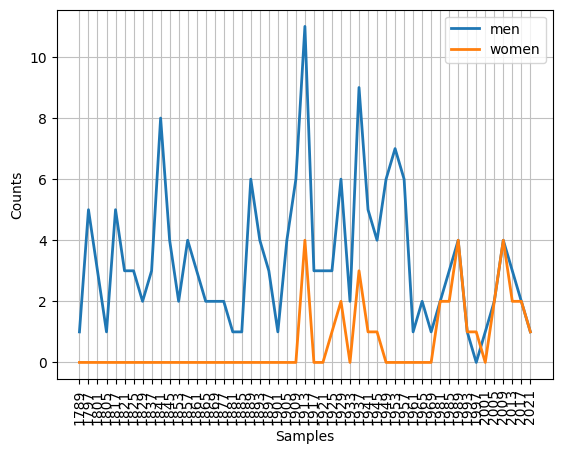

<Axes: xlabel='Samples', ylabel='Counts'>

In [50]:
cfd=nltk.ConditionalFreqDist( \
                       (target,fileid[:4]) \
                       for fileid in inaugural.fileids() \
                       for w in inaugural.words(fileid) \
                       for target in ['men','women']
                       if w.lower().startswith(target))
cfd.plot()

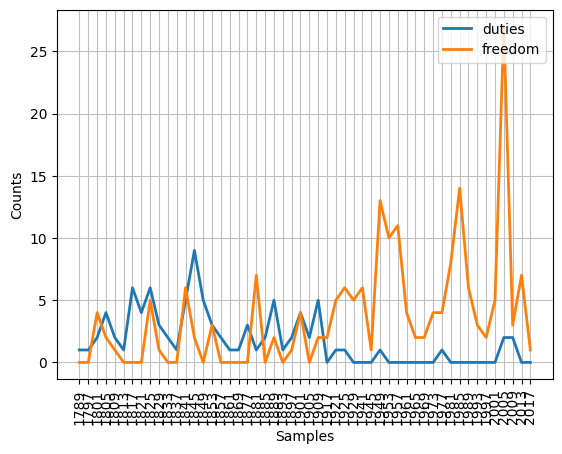

<Axes: xlabel='Samples', ylabel='Counts'>

In [51]:
cfd=nltk.ConditionalFreqDist( \
                       (target,fileid[:4]) \
                       for fileid in inaugural.fileids() \
                       for w in inaugural.words(fileid) \
                       for target in ['duties','freedom']
                       if w.lower().startswith(target))
cfd.plot()

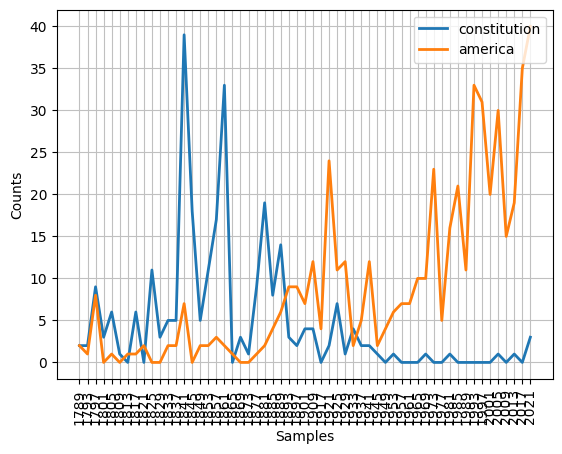

<Axes: xlabel='Samples', ylabel='Counts'>

In [52]:
cfd=nltk.ConditionalFreqDist( \
                       (target,fileid[:4]) \
                       for fileid in inaugural.fileids() \
                       for w in inaugural.words(fileid) \
                       for target in ['america','constitution']
                       if w.lower().startswith(target))
cfd.plot()